# Perceptron 

####  Most fundamental building block of these so-called deep neural networks: the neuron. 

    -Combine several of them into a layer and create a neural network called the perceptron

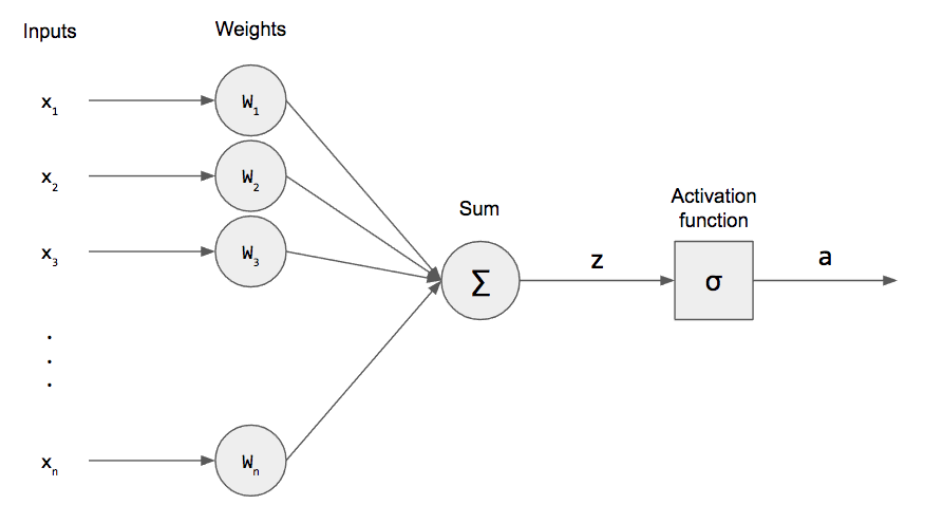

In [53]:
from IPython.display import Image
Image(filename='ex3-1.png')

In this model, we have n binary inputs (usually given as a vector) and exactly the same number of weights W_1, ..., W_n.

We multiply these together and sum them up. We denote this as z and call it the pre-activation.

###### Zenva Pty Ltd- reference

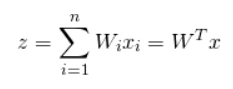

In [55]:
from IPython.display import Image
Image(filename='ex3-2.png')

There is another term, called the bias, that is just a constant factor.

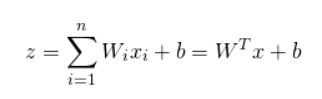

In [56]:
from IPython.display import Image
Image(filename='ex3-3.png')

After taking the weighted sum, we apply an activation function, sigma notation , to this and produce an activation a. 

The activation function for perceptrons here in this called a step function because, if we were to plot it, it would look like a stair.

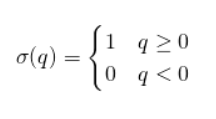

In [57]:
from IPython.display import Image
Image(filename='ex3-4.png')

# Before getting code, why we need a bias term ? 

### Technically : 

    - It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron.
    
   *** Moreover, bias value allows you to shift the activation function to either right or left.***

    - output  =  sum (weights * inputs) + bias 
    - Here, bias acts like a constant which helps the model to fit the given data. 
    The steepness of the Sigmoid depends on the weight of the inputs.

### To understand it better 



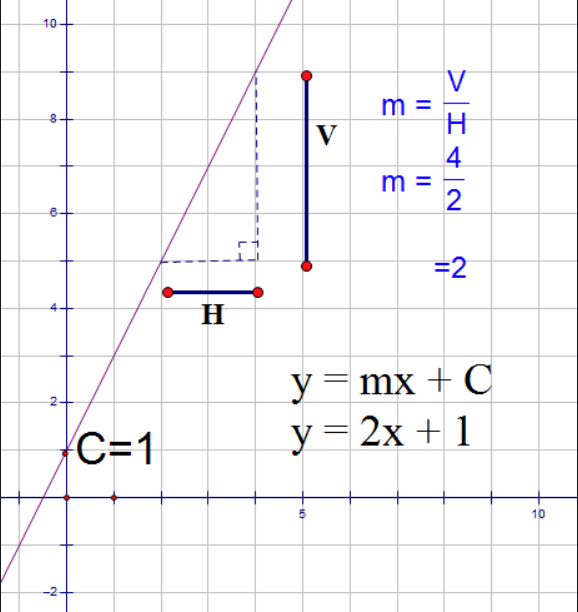

In [61]:
from IPython.display import Image
Image(filename='ex3-5.png')
#http://www.mathsmutt.co.uk/files/sl1_files/20.gif

#If we dont use constant here, the line always tries to pass through the origin 

### Perceptron learning 

 ***Rosenblatt,*** the creator of the perceptron, also had some thoughts on how to train neurons based on his intuition about biological neurons. 
 
 Rosenblatt intuited a simple learning algorithm.

#### Update rule 

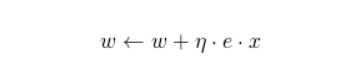

In [62]:
from IPython.display import Image
Image(filename='ex3-6.png')

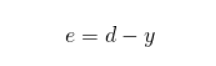

In [63]:
from IPython.display import Image
Image(filename='ex3-7.png')

In [47]:
class Perceptron(object):
    """Implements a perceptron network"""
    def __init__(self, input_size, lr=1, epochs=10):
        self.W = np.zeros(input_size+1)
        # add one for bias
        self.epochs = epochs
        self.lr = lr
    
    def activation_fn(self, x):
        #return (x >= 0).astype(np.float32)
        return 1 if x >= 0 else 0
 
    def predict(self, x):
        z = self.W.T.dot(x)
        a = self.activation_fn(z)
        return a
 
    def fit(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                x = np.insert(X[i], 0, 1)   # Do you think, why 0,1 here ?? 
                #print(X[i])
                y = self.predict(x)
                e = d[i] - y
                self.W = self.W + self.lr * e * x

In [48]:
if __name__ == '__main__':
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    d = np.array([0, 0, 0, 1])
    #print(d.shape[0])
 
    perceptron = Perceptron(input_size=2)
    perceptron.fit(X, d)
    print(perceptron.W)
    
    
    #a = perceptron.predict([1, 0, 1])
    #print(a)

[-2.  2.  1.]


##### The insert() function takes the following parameters −

    - numpy.insert(arr, obj, values, axis)
    
1	
arr

Input array

2	
obj

The index before which insertion is to be made

3	
values

The array of values to be inserted

4	
axis

The axis along which to insert. If not given, the input array is flattened

In [28]:
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

In [30]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [34]:

for i in range(4):
    x = np.insert(X[i], 0, 1)
    print(x)

[1 0 0]
[1 0 1]
[1 1 0]
[1 1 1]


array([1, 1, 1])

#### Some other way of doing it! 

##### for more information 



In [49]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        #The reason we add one to the input size is to include the bias in the weight vector.
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)


In [50]:
import numpy as np             


training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)


inputs = np.array([0, 0])
perceptron.predict(inputs) 

0

In [51]:
inputs = np.array([1, 0])
perceptron.predict(inputs) 

0

In [52]:
inputs = np.array([1, 1])
perceptron.predict(inputs) 

1